Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 359s 918ms/step - accuracy: 0.8175 - loss: 1.6535 - val_accuracy: 0.3413 - val_loss: 22.6423
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 252s 672ms/step - accuracy: 0.8790 - loss: 0.3588 - val_accuracy: 0.3517 - val_loss: 4.3882
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 248s 660ms/step - accuracy: 0.8879 - loss: 0.3019 - val_accuracy: 0.8697 - val_loss: 0.8285
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 265s 707ms/step - accuracy: 0.9053 - loss: 0.2515 - val_accuracy: 0.8250 - val_loss: 0.4157
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 298s 793ms/step - accuracy: 0.9217 - loss: 0.2120 - val_accuracy: 0.9107 - val_loss: 0.2585
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 299s 798ms/step - accuracy: 0.9317 - loss: 0.1819 - val_accuracy: 0.9500 - val_loss: 0.1253
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 288s 767ms/step - accuracy: 0.9338 - loss: 0.1836 - val_accuracy: 0.9350 - val_los

✅ CNN model saved as 'lung_cancer_model.h5'


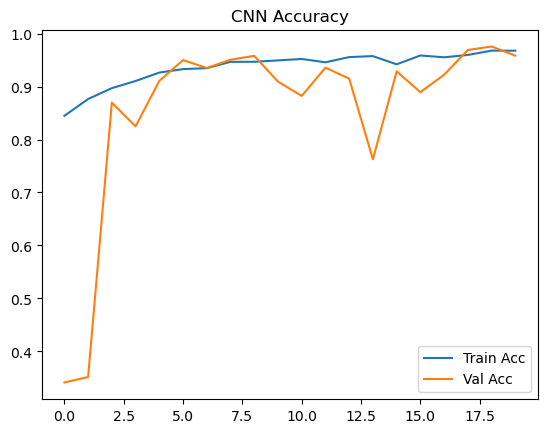

In [3]:
# cnn_train.py

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths and constants
DATASET_PATH = "lung_image_sets"
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20

# Data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS)

# Save model
model.save("lung_cancer_model.h5")
print("✅ CNN model saved as 'lung_cancer_model.h5'")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.legend()
plt.savefig("cnn_accuracy_plot.png")
plt.show()
